Saving Unemployment in India.csv to Unemployment in India.csv
Dataset Loaded Successfully

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68

/tmp/ipython-input-487848312.py:39: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_col] = pd.to_datetime(df[date_col], errors="coerce")


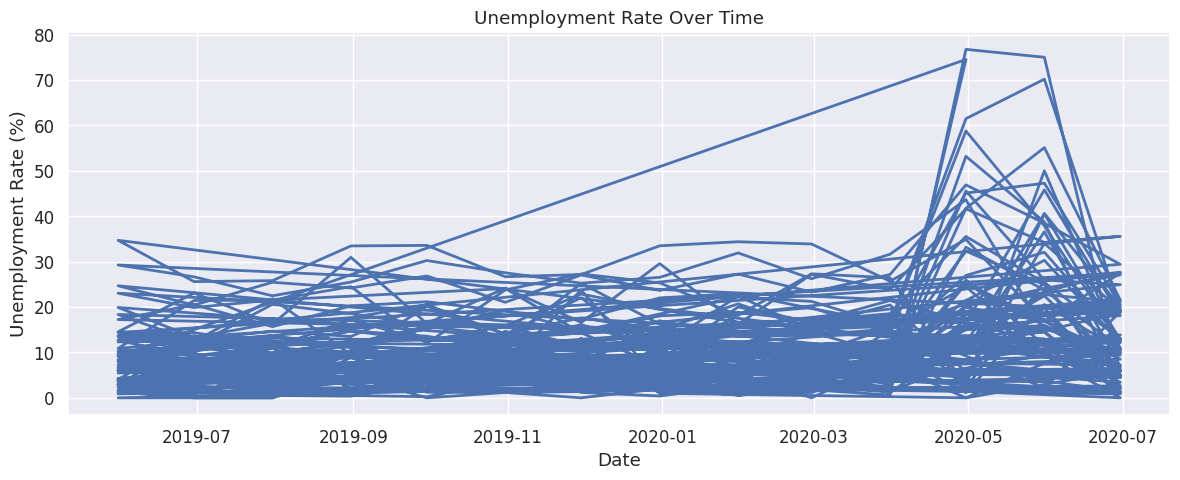

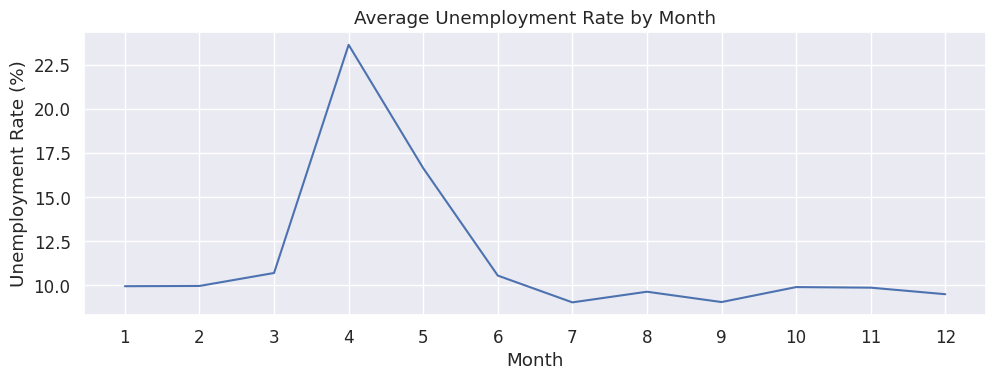

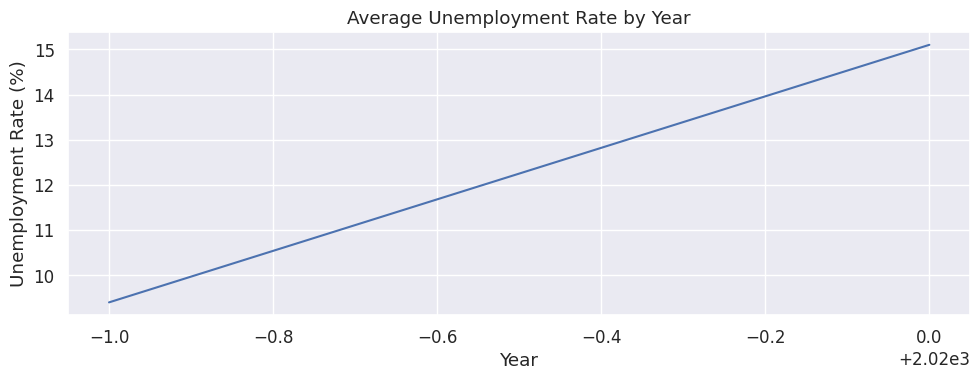

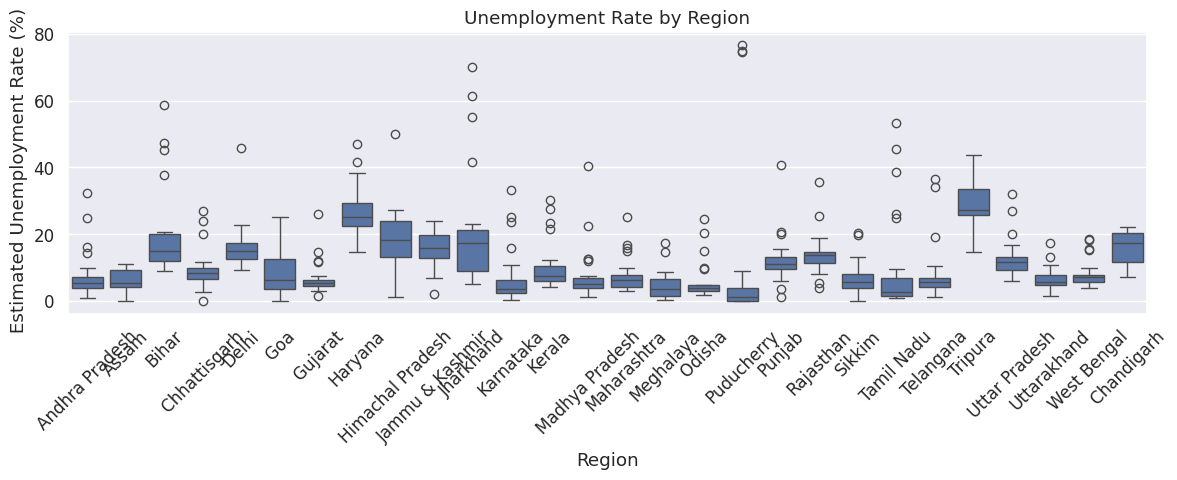

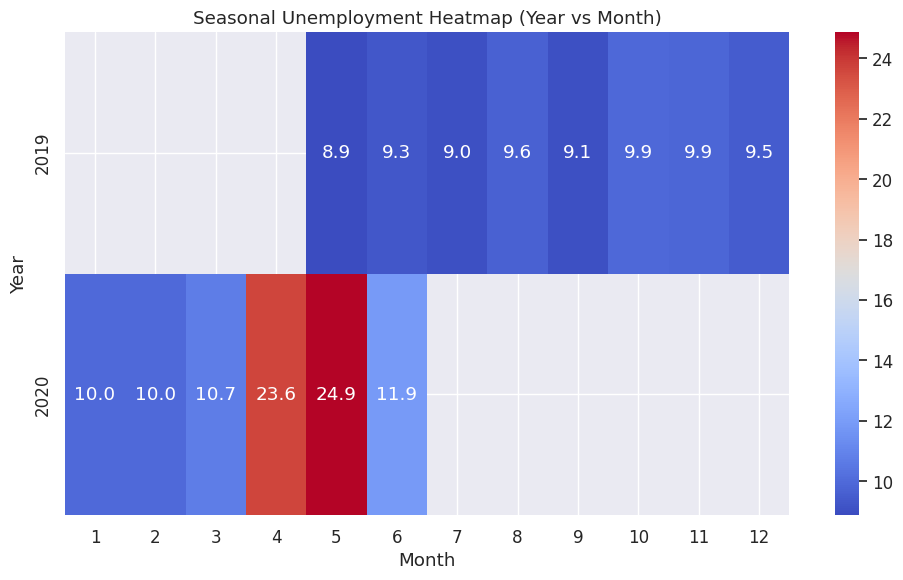


Key Insights:
-----------------------------------------
- Highest unemployment year: 2020 (15.10%)
- Lowest unemployment year: 2019 (9.40%)
- Month with highest unemployment on average: 4
- Month with lowest unemployment on average: 7

- Regions with highest average unemployment:
Region
Tripura      28.350357
Haryana      26.283214
Jharkhand    20.585000
Name:  Estimated Unemployment Rate (%), dtype: float64

Analysis Complete.


In [1]:
# ============================================================
# TASK 2: UNEMPLOYMENT ANALYSIS WITH PYTHON – FULL COLAB CODE
# ============================================================

# ------------------ 1. UPLOAD DATASET -----------------------

from google.colab import files
uploaded = files.upload()   # Upload your unemployment CSV file

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set(font_scale=1.1)

# Read uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("Dataset Loaded Successfully\n")
print(df.head())

# ------------------ 2. CLEANING / STANDARDIZING -------------
print("\nColumns in dataset:", df.columns.tolist())

# Auto-detect date column
date_col = None
for col in df.columns:
    if "date" in col.lower():
        date_col = col
        break

if date_col is None:
    raise ValueError("No date column detected. Please ensure the dataset contains a Date column.")

df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

# Auto-detect unemployment percentage column
rate_col = None
for col in df.columns:
    if "unemploy" in col.lower() or "rate" in col.lower():
        rate_col = col
        break

if rate_col is None:
    raise ValueError("No unemployment rate column found. Ensure dataset has unemployment percentage column.")

# Identify region column (first string column except date)
region_col = None
for col in df.columns:
    if df[col].dtype == object and col != date_col:
        region_col = col
        break

print("\nDetected Columns:")
print("Date Column:", date_col)
print("Unemployment Rate Column:", rate_col)
print("Region Column:", region_col)

# Drop rows with missing values
df = df.dropna()

# ------------------ 3. BASIC INFO ---------------------------
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# ------------------ 4. VISUALIZATIONS -----------------------

# ---- 4.1 Trend Line (Overall) ----
plt.figure(figsize=(12, 5))
plt.plot(df[date_col], df[rate_col], linewidth=2)
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()

# ---- 4.2 Monthly Trend ----
df["Month"] = df[date_col].dt.month
monthly_avg = df.groupby("Month")[rate_col].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_avg)
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# ---- 4.3 Yearly Trend ----
df["Year"] = df[date_col].dt.year
yearly_avg = df.groupby("Year")[rate_col].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(data=yearly_avg)
plt.title("Average Unemployment Rate by Year")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()

# ---- 4.4 Region-wise Boxplot ----
if region_col:
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df, x=region_col, y=rate_col)
    plt.title("Unemployment Rate by Region")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ---- 4.5 Heatmap (Seasonal Trends) ----
pivot = df.pivot_table(values=rate_col, index="Year", columns="Month", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Seasonal Unemployment Heatmap (Year vs Month)")
plt.tight_layout()
plt.show()

# ------------------ 5. INSIGHTS -----------------------------

print("\nKey Insights:")
print("-----------------------------------------")

# Highest / Lowest Unemployment Year
if not yearly_avg.empty:
    print(f"- Highest unemployment year: {yearly_avg.idxmax()} ({yearly_avg.max():.2f}%)")
    print(f"- Lowest unemployment year: {yearly_avg.idxmin()} ({yearly_avg.min():.2f}%)")

# Monthly Peaks
if not monthly_avg.empty:
    peak_month = monthly_avg.idxmax()
    dip_month = monthly_avg.idxmin()
    print(f"- Month with highest unemployment on average: {peak_month}")
    print(f"- Month with lowest unemployment on average: {dip_month}")

# Region Insights
if region_col:
    print("\n- Regions with highest average unemployment:")
    print(df.groupby(region_col)[rate_col].mean().sort_values(ascending=False).head(3))

print("\nAnalysis Complete.")
